#  Income evaluation prediction ML model

# Objective


    1. By utilizing machine learning techniques, we aim to develop a robust model that can accurately classify individuals into different income categories (e.g., high-income and low-income) based on the provided features.



    2. Identify the factors that contribute to higher incomes.
    


# About the dataset-

This dataset contains 15 variables related to employee's profile, demographic, economic, and social data pertaining to a specific time to all persons in a country or delimited part of a country.

The code below will show us some information about the continunous parameters that our dataset contains.

    1. Age is Age
    2. fnlwgt is final weight, or the number of people that are represented in this group relative to the overall population of this dataset.
    3. education-num is a numerical way of representing Education level
    4. capital-gain is the money made investments
    5. capital-loss is the loss from investments
    6. hours-per-week is the number of hours worked during a week

In [1]:
# import basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
datafile=pd.read_csv('Data_inc.csv')

In [3]:
datafile.head()

,Age,Profession Class,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income,Unnamed: 15
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,NaN
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,NaN
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,NaN
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,NaN
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,NaN


In [4]:
datafile.shape

(32561, 16)

In [5]:
# This col has no significance so dropping it
datafile.drop('Unnamed: 15',axis=1,inplace=True)

In [6]:
datafile.shape

(32561, 15)

In [7]:
datafile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               32561 non-null  int64 
 1   Profession Class  32561 non-null  object
 2   Final_census      32561 non-null  int64 
 3    Education        32561 non-null  object
 4    Education-num    32561 non-null  int64 
 5    marital-status   32561 non-null  object
 6    occupation       32561 non-null  object
 7    relationship     32561 non-null  object
 8    race             32561 non-null  object
 9   Gender            32561 non-null  object
 10   capital-gain     32561 non-null  int64 
 11   capital-loss     32561 non-null  int64 
 12   hours-per-week   32561 non-null  int64 
 13   country          32561 non-null  object
 14   income           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Dataset is showing that no null values are there. Numeric columns are correctly typed as int. But the column names are not properlyspaced and named.

In [8]:
# Renaming columns properly

datafile.rename({' Education':'Education',' Education-num':'Education_num',' marital-status':'Marital_status',
                 ' occupation':'Occupation',' relationship':'Relationship',' race':'Race',' capital-gain':'Capital_gain',
                ' capital-loss':'Capital_loss',' hours-per-week':'Hours_per_week',' country':'Country',
                 ' income':'Income'}, axis=1,inplace=True)

In [9]:
datafile.isnull().sum()

Age                 0
Profession Class    0
Final_census        0
Education           0
Education_num       0
Marital_status      0
Occupation          0
Relationship        0
Race                0
Gender              0
Capital_gain        0
Capital_loss        0
Hours_per_week      0
Country             0
Income              0
dtype: int64

# 24 Dupicate rows found -

In [10]:
datafile.duplicated().sum()

24

In [11]:
datafile[datafile.duplicated()]

,Age,Profession Class,Final_census,Education,Education_num,Marital_status,Occupation,Relationship,Race,Gender,Capital_gain,Capital_loss,Hours_per_week,Country,Income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [12]:
datafile[datafile['Final_census']==379959]

,Age,Profession Class,Final_census,Education,Education_num,Marital_status,Occupation,Relationship,Race,Gender,Capital_gain,Capital_loss,Hours_per_week,Country,Income
16846,35,Private,379959,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
32404,35,Private,379959,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K


In [13]:
duplicated_index=datafile[datafile.duplicated()].index

In [14]:
duplicated_index.shape

(24,)

In [15]:
duplicated_index

Int64Index([ 4881,  5104,  9171, 11631, 13084, 15059, 17040, 18555, 18698,
            21318, 21490, 21875, 22300, 22367, 22494, 25872, 26313, 28230,
            28522, 28846, 29157, 30845, 31993, 32404],
           dtype='int64')

# Dropping duplicate values -

In [16]:
datafile.drop(duplicated_index,axis=0,inplace=True)

In [17]:
datafile.shape

(32537, 15)

In [18]:
datafile.duplicated().sum()

0

#  we have some rows where we have ' ?' for null or unknown values, so we will replace it with nan values.

In [19]:

datafile.replace(' ?',np.NaN,inplace=True)

In [20]:
datafile.isnull().sum()

Age                    0
Profession Class    1836
Final_census           0
Education              0
Education_num          0
Marital_status         0
Occupation          1843
Relationship           0
Race                   0
Gender                 0
Capital_gain           0
Capital_loss           0
Hours_per_week         0
Country              582
Income                 0
dtype: int64

In [21]:
datafile['Profession Class'].value_counts(normalize=True)

 Private             0.738510
 Self-emp-not-inc    0.082733
 Local-gov           0.068174
 State-gov           0.042279
 Self-emp-inc        0.036351
 Federal-gov         0.031269
 Without-pay         0.000456
 Never-worked        0.000228
Name: Profession Class, dtype: float64

In [22]:
datafile['Occupation'].value_counts(normalize=True)

 Prof-specialty       0.134749
 Craft-repair         0.133381
 Exec-managerial      0.132436
 Adm-clerical         0.122760
 Sales                0.118916
 Other-service        0.107220
 Machine-op-inspct    0.065159
 Transport-moving     0.052030
 Handlers-cleaners    0.044602
 Farming-fishing      0.032319
 Tech-support         0.030201
 Protective-serv      0.021144
 Priv-house-serv      0.004789
 Armed-Forces         0.000293
Name: Occupation, dtype: float64

In [23]:
# Since we cannot impute on our own - mode-'Prof-specialty' in occupation. so we will assign 'Other-service' to nan values
datafile['Occupation']=datafile['Occupation'].str.strip()
datafile['Occupation'].replace(np.nan,'Other-service',inplace=True)

In [24]:
# For professional class we cannot go with mode 'private' so assign others to nan values
datafile['Profession Class']=datafile['Profession Class'].str.strip()
datafile['Profession Class'].replace(np.nan,'Private',inplace=True)

In [25]:
datafile['Country'].value_counts(normalize=True)

 United-States                 0.912314
 Mexico                        0.019997
 Philippines                   0.006196
 Germany                       0.004287
 Canada                        0.003787
 Puerto-Rico                   0.003568
 El-Salvador                   0.003317
 India                         0.003129
 Cuba                          0.002973
 England                       0.002816
 Jamaica                       0.002535
 South                         0.002504
 China                         0.002347
 Italy                         0.002284
 Dominican-Republic            0.002191
 Vietnam                       0.002097
 Japan                         0.001940
 Guatemala                     0.001940
 Poland                        0.001878
 Columbia                      0.001846
 Taiwan                        0.001596
 Haiti                         0.001377
 Iran                          0.001346
 Portugal                      0.001158
 Nicaragua                     0.001064


# Since almost 90% population is of US here we have grouped the non-US and null values in 'Other' country.


In [26]:
datafile['Country']=datafile['Country'].str.strip()
datafile['Country'].mask(datafile['Country']!='United-States','Other',inplace=True)

In [27]:
datafile['Country'].value_counts()

United-States    29153
Other             3384
Name: Country, dtype: int64

In [28]:
datafile.isnull().sum()

Age                 0
Profession Class    0
Final_census        0
Education           0
Education_num       0
Marital_status      0
Occupation          0
Relationship        0
Race                0
Gender              0
Capital_gain        0
Capital_loss        0
Hours_per_week      0
Country             0
Income              0
dtype: int64

# In Education columns we could see from nursery to 12th, it can be grouped as High school

In [29]:
datafile['Education'].value_counts(normalize=True)

 HS-grad         0.322525
 Some-college    0.223807
 Bachelors       0.164520
 Masters         0.052924
 Assoc-voc       0.042475
 11th            0.036113
 Assoc-acdm      0.032793
 10th            0.028675
 7th-8th         0.019824
 Prof-school     0.017703
 9th             0.015797
 12th            0.013308
 Doctorate       0.012693
 5th-6th         0.010204
 1st-4th         0.005102
 Preschool       0.001537
Name: Education, dtype: float64

In [30]:
datafile['Education']=datafile['Education'].str.strip()
datafile['Education'].replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th'],'High School',inplace=True)

In [31]:
datafile['Education'].value_counts(normalize=True)

HS-grad         0.322525
Some-college    0.223807
Bachelors       0.164520
High School     0.130559
Masters         0.052924
Assoc-voc       0.042475
Assoc-acdm      0.032793
Prof-school     0.017703
Doctorate       0.012693
Name: Education, dtype: float64

In [32]:
datafile.head()

,Age,Profession Class,Final_census,Education,Education_num,Marital_status,Occupation,Relationship,Race,Gender,Capital_gain,Capital_loss,Hours_per_week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,High School,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Other,<=50K


# EDA

# Now data is cleaned for analysing

# 1. Age distribution Analysis

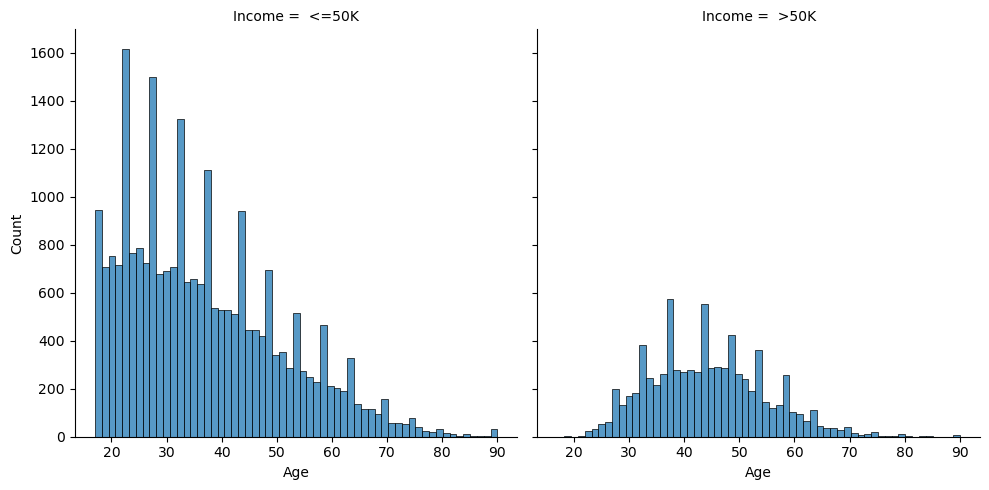

In [33]:
sns.displot(data=datafile,x='Age',col='Income')
plt.show()

# Observations-

1. The age is rightly skewed / positively skewed for the people having income <=50K.
2. For people having income>50K, the age is normly distributed.
3. Young employees are low paid and middle/old employees are high paid.
4. Very less number of aged employees are there.
5. Half of employees over 50 years of age are still under 50K.


# 2. Final census

ecdf- Empirical Commutative Distribution plot - represents the proportion or count of observations falling below each unique value in a dataset. It help us to visualize each and every data point on a plot.It also aids direct comparisons between multiple distributions. 

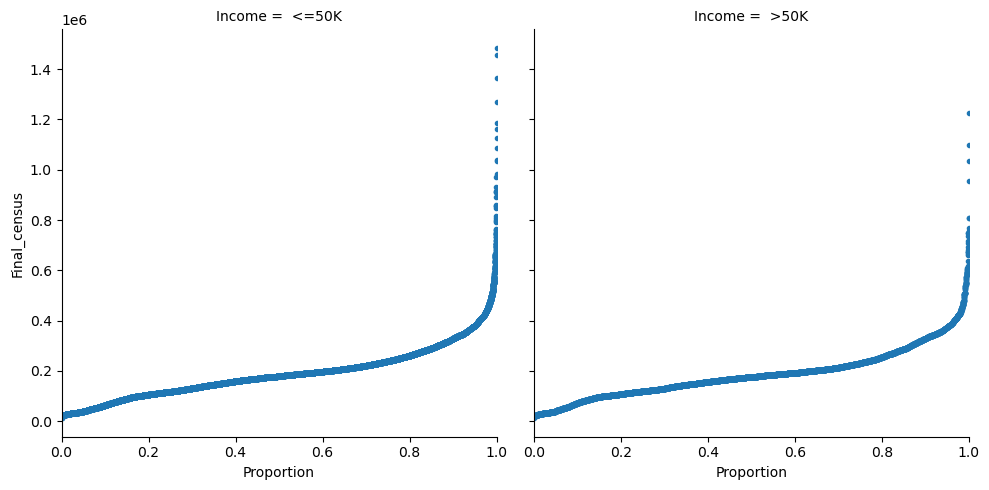

In [34]:
sns.displot(data=datafile,y='Final_census',col='Income',kind='ecdf',marker = '.', linestyle = 'none')
plt.show()

# Observation-
1. Here we could see both the low and high income group have same distribution, so we will be dropping it while modelling.

# 3. Education num

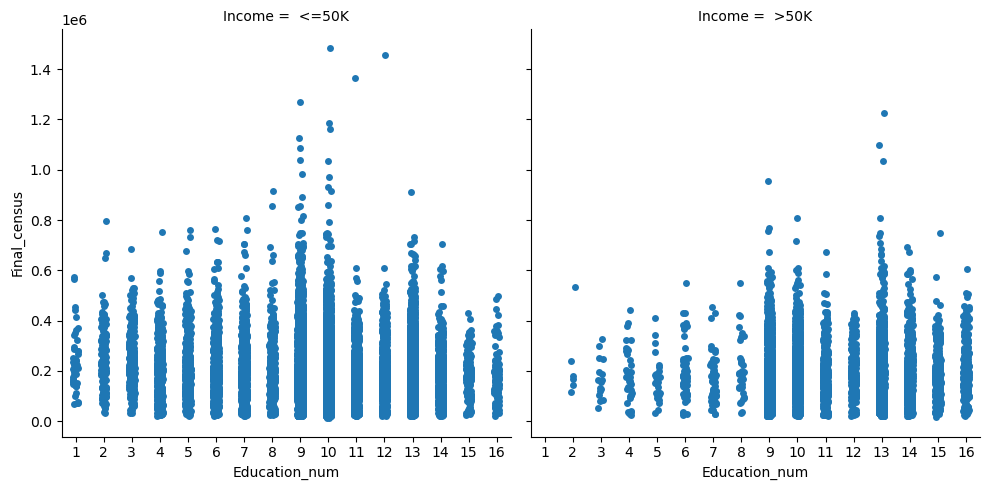

In [35]:
sns.catplot(data=datafile,x='Education_num',y='Final_census',col='Income',estimator='sum')

# Observations-
1. The number of years of education for people having <=50k income is mostly - 9,10,13 years.
2. People having >50K income are mostly above 9 years of education num.
   We can say high education num contributes to high income.
3. Mostly people are having 9,10 and 13 years of education years.

# 4. Capital Gain

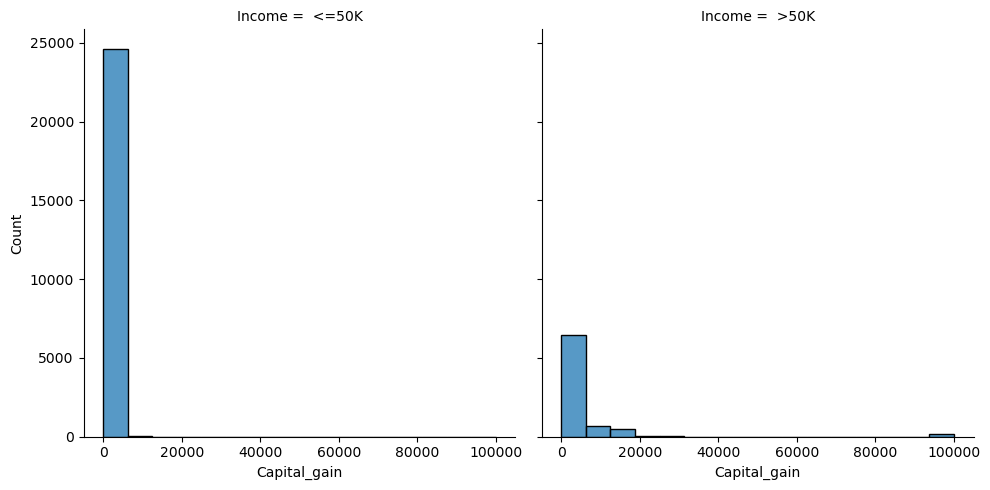

In [36]:
sns.displot(data=datafile,x='Capital_gain',col='Income')

# Observations-
1. Mostly people having income >50K are having capital gains. Due to high income they must have invested and then earned gains.
2. About 91% percent employees are having no capital gains.
3. This shows empoyees have either low interest in investing in assets (or taking risk) or have low purchasing power for assets.

# 5. Capital Loss

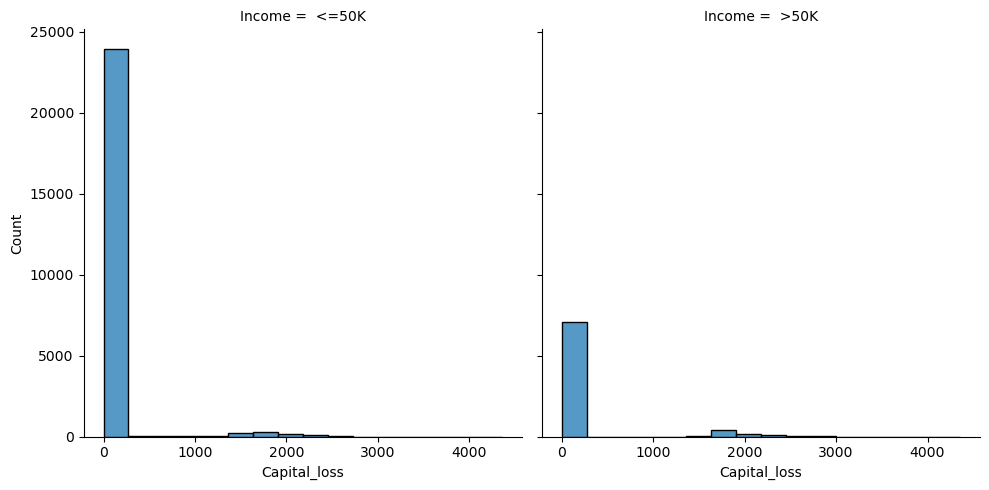

In [37]:
sns.displot(data=datafile,x='Capital_loss',col='Income')

# Observations-
1. About 95% of employees are having no capital losses.
2. This confirms the above assumptions that either low interest in investing in assets (or taking risk) or have low purchasing power for assets.

# 6. Hours per week

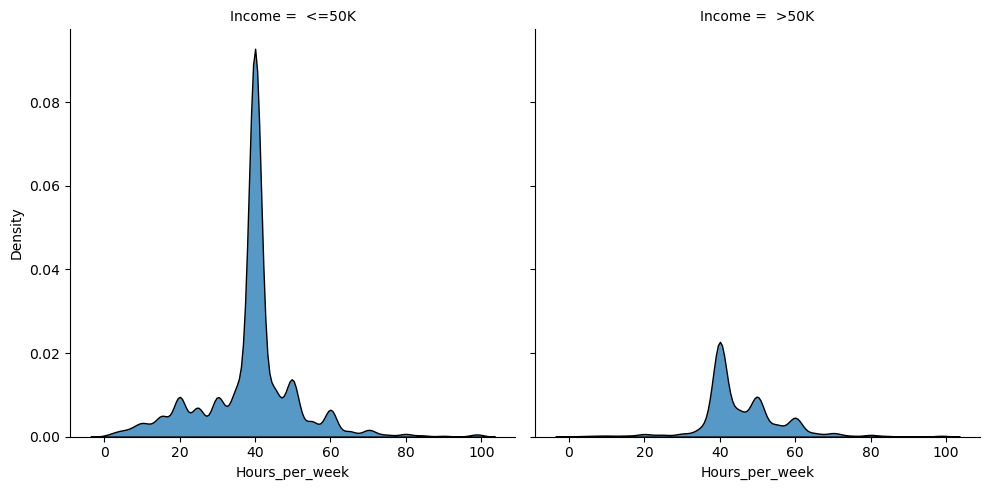

In [38]:
sns.displot(data=datafile,x='Hours_per_week',col='Income',multiple="stack", kind="kde")

# Observations-
1. Very high number of people spend around 40 hrs per week specially for people <=50K income.
2. May be employees are not paid for overtime so they are not interested for working for overtime.

# 7. Profession class

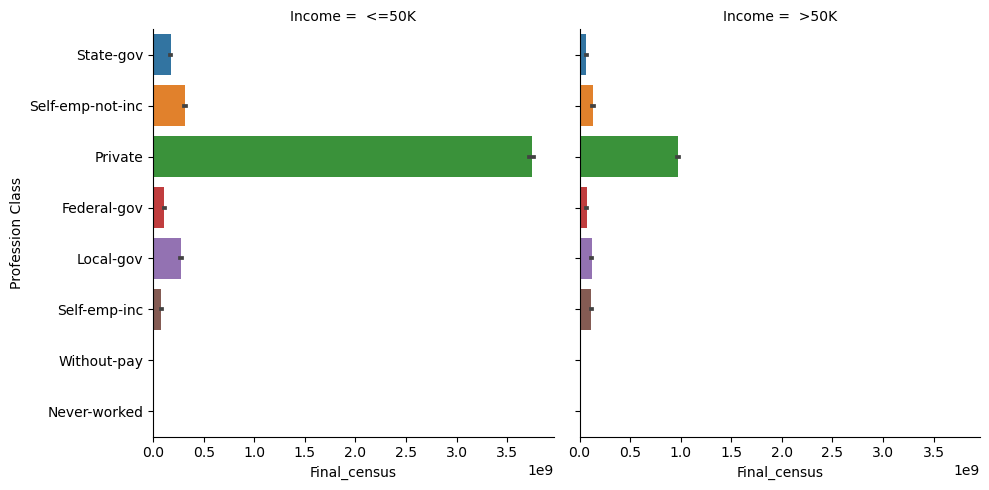

In [39]:
sns.catplot(data=datafile,y='Profession Class',x='Final_census',col='Income',kind='bar',estimator='sum')
plt.show()

# Oservations-
1. Employees are mostly working in private jobs.
2. This shows large portion of privatisation of US economy.


# 8. Education

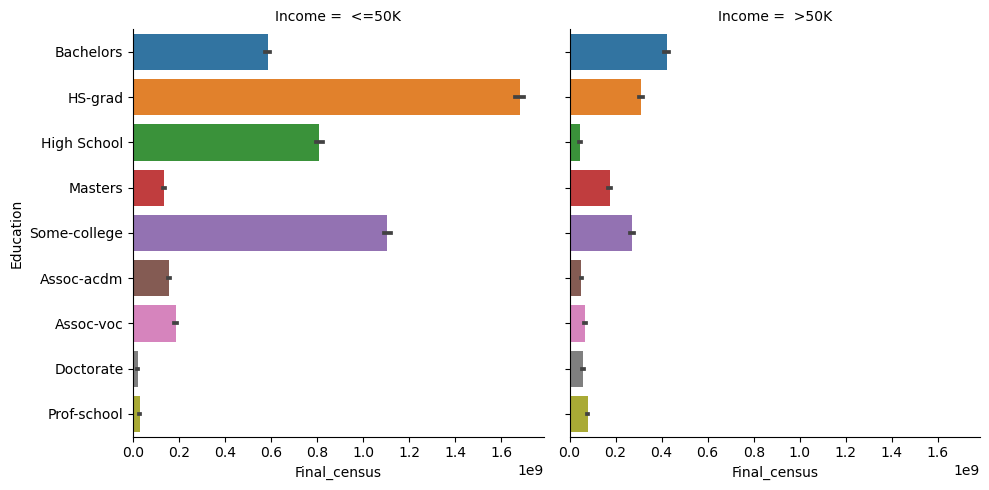

In [40]:
sns.catplot(data=datafile,y='Education',col='Income',x='Final_census',kind='bar',estimator='sum')
plt.show()

# Observations-
1. Bachelors,HS-grad,Some-College are earning moslty for both income groups.
2. Very less employees are having High education.
3. Even highly educated - Doctorate,Masters,etc are having low income than 50K may be due to less experience.


# 9. Marital status

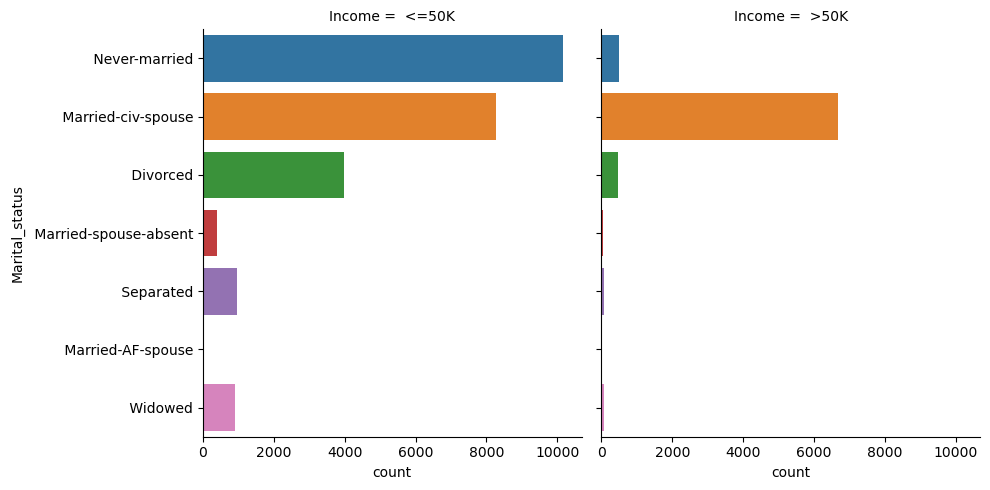

In [41]:
sns.catplot(data=datafile,y='Marital_status',col='Income',kind="count")
plt.show()


# Observations-
1. For <=50K income group, Never married, Married civ spouse employees are maximum.
2. We could see a good number of divorced having income<=50K. This can raise a question - Is low income increasing probability of getting divorce ? 
3. Do low income employees pefer to live single than in family? beccause major portion of low income are single.

# 10. Occupation

In [42]:
occu=datafile.groupby('Occupation')['Final_census'].agg(["count","sum"]).sort_values(by="count",ascending=False)
occu

,count,sum
Occupation,,
Other-service,5134,968334257
Prof-specialty,4136,766031265
Craft-repair,4094,786964477
Exec-managerial,4065,749680696
Adm-clerical,3768,723731835
Sales,3650,696733506
Machine-op-inspct,2000,390009053
Transport-moving,1597,304015069
Handlers-cleaners,1369,279775542


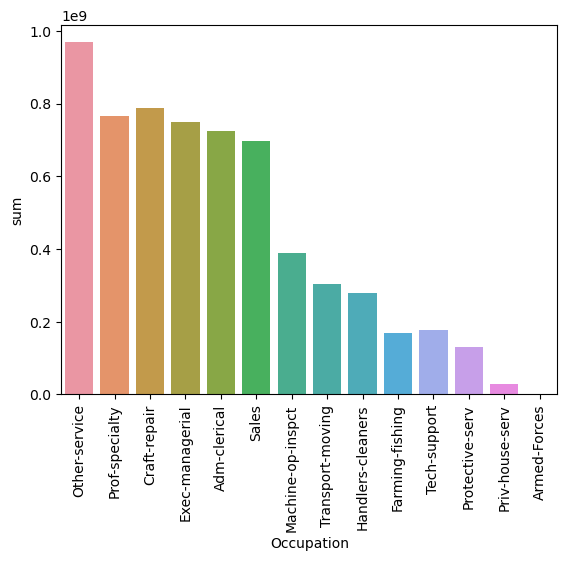

In [43]:
sns.barplot(data=occu,x=occu.index,y='sum')
plt.xticks(rotation=90)
plt.show()

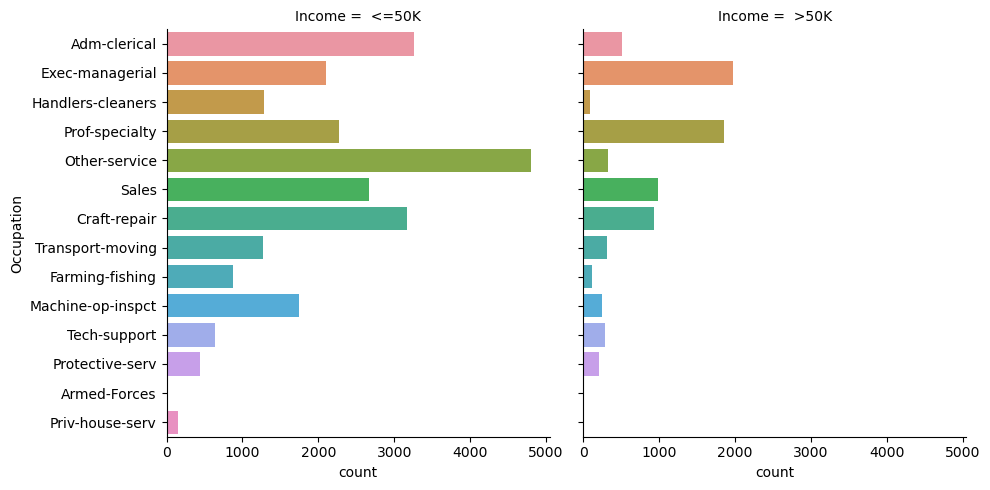

In [44]:
sns.catplot(data=datafile,y='Occupation',col='Income',kind="count")
plt.show()


# Observations-
1. Mostly employees are in prof-specialty,creaftrepair,executive,administrative and sales jobs.
2. In >50K income group, exec-managerial,prof-specialty are there.

# 11. Relationship

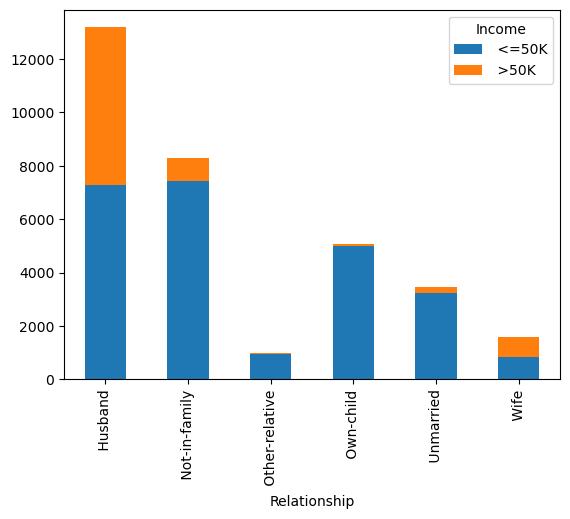

In [45]:
crosstb=pd.crosstab(datafile.Relationship,datafile.Income)
crosstb.plot(kind="bar", stacked=True, rot=0,sort_columns=True)
plt.xticks(rotation=90)
plt.show()

# Observations-
1. Mostly husband and not in family are employees.
2. Not in family , having dependents, unmarried are having 90% employee with low income.
3. Pair are having mostly high income, whereas, single working are mostly low income.

# 12 Race

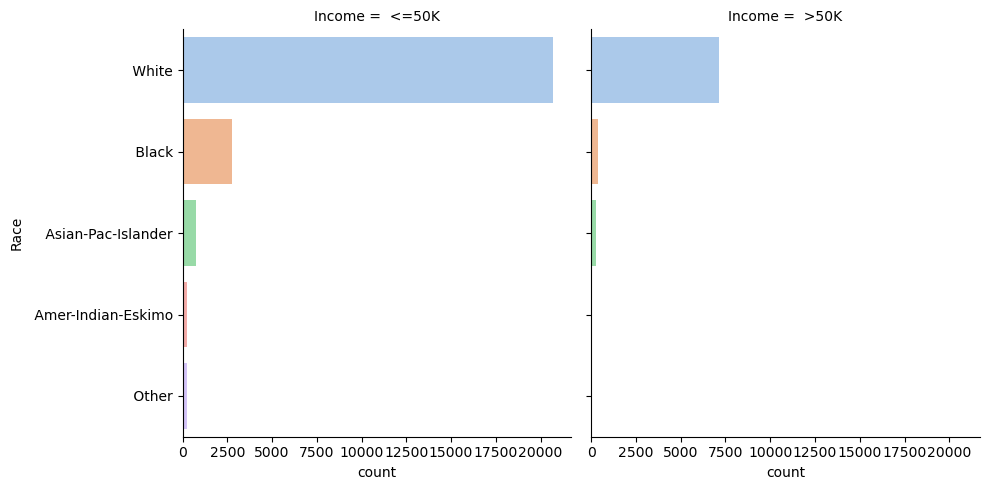

In [46]:

sns.catplot(data=datafile,y='Race',col='Income',kind="count",palette="pastel",estimator='sum')


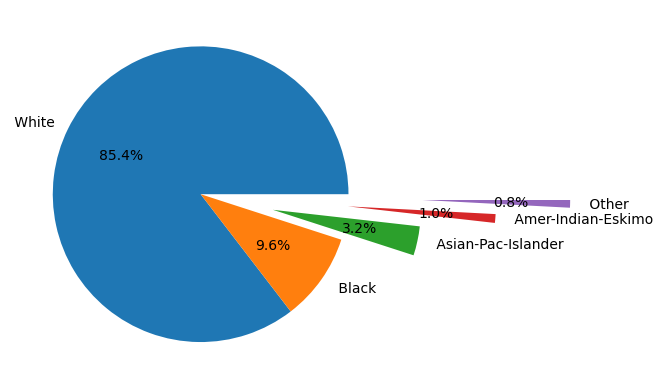

In [47]:
x=datafile['Race'].value_counts()
plt.pie(x,labels=x.index,autopct='%1.1f%%',explode=[0,0,0.5,1,1.5])
plt.show()

# Observations-
1. Almost 85% employees are white
2. This suggest whites are given more preference.

# 13. Gender

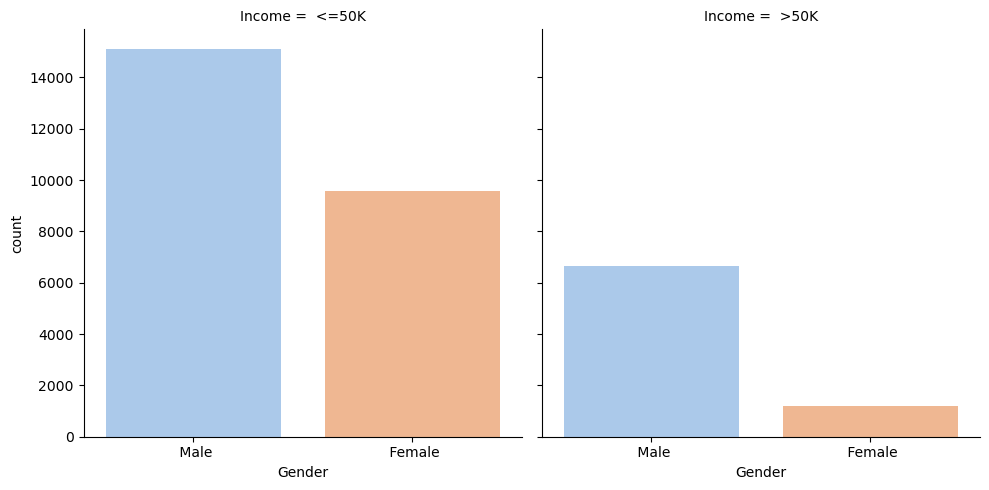

In [48]:
sns.catplot(data=datafile,x='Gender',col='Income',kind="count",palette="pastel")
plt.show()

In [49]:
datafile['Gender'].value_counts(normalize=True)

 Male      0.669238
 Female    0.330762
Name: Gender, dtype: float64

# Observations-
1. Around 67% are males out of total employees.
2. Males are leading in both income groups.
3. Very less women are having income >50K.

# 14. Country

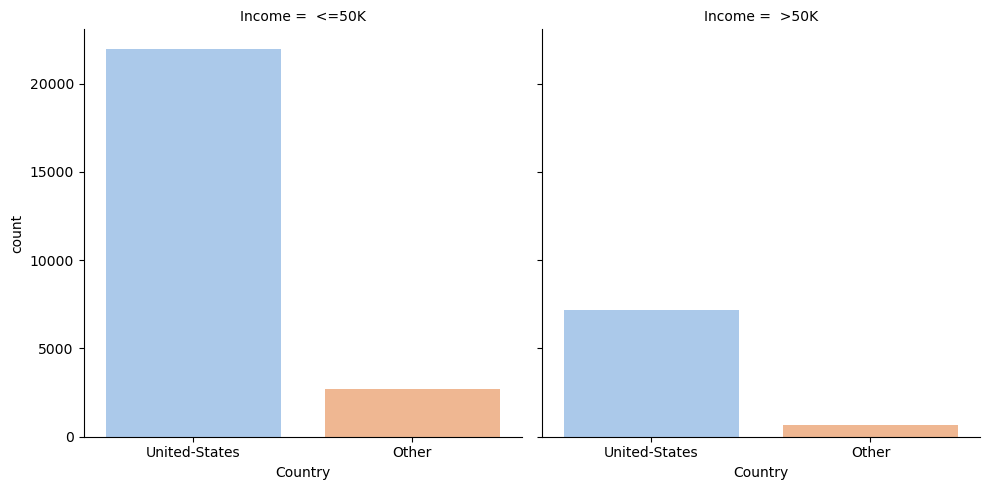

In [50]:
sns.catplot(data=datafile,x='Country',col='Income',kind="count",palette="pastel")
plt.show()

In [51]:
datafile['Country'].value_counts(normalize=True)

United-States    0.895995
Other            0.104005
Name: Country, dtype: float64

# Observations -
1. 90% of employees are US residents.
2. This suggest strict immigration policies of USA as confirmed by race analysis.

# 15 Income

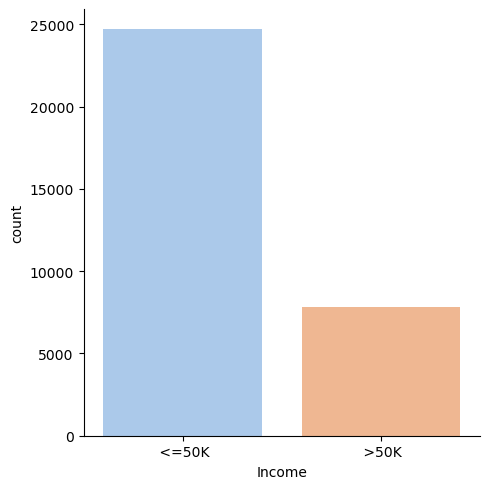

In [52]:
sns.catplot(data=datafile,x='Income',kind="count",palette="pastel")
plt.show()

In [53]:
datafile['Income'].value_counts(normalize=True)

 <=50K    0.759074
 >50K     0.240926
Name: Income, dtype: float64

# Observations-
1. Almost 75% of salary distribution lies in cluster of employees who is having exact 50000 salary or less than that.

# 16 Other relational analysis

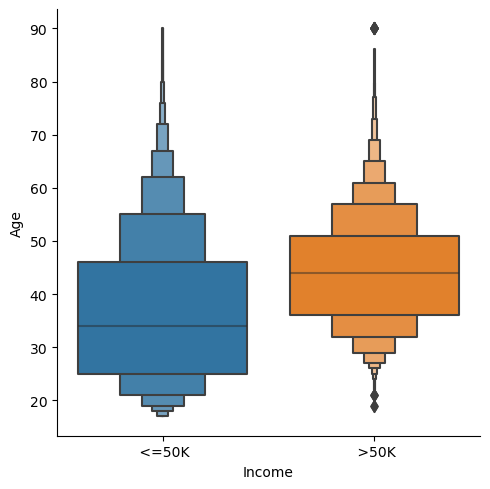

In [54]:
sns.catplot(data=datafile,x='Income',kind="boxen",y='Age' )
plt.show()

# Observations -
1. Avg age is 35 and 45 for low and high income respectively.

In [55]:
datafile.describe()

,Age,Final_census,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Observations-
1. Age - Range of age is between 17 to 90 and mean age is 39.
2. Education_num- Years spent on education - Range is 1 to 16 with mean of 10.
4. Hours per week - Range is 1 to 99 with mean of 40.


# Heatmap used to visualize the correlation of numerical variables.

<AxesSubplot: >

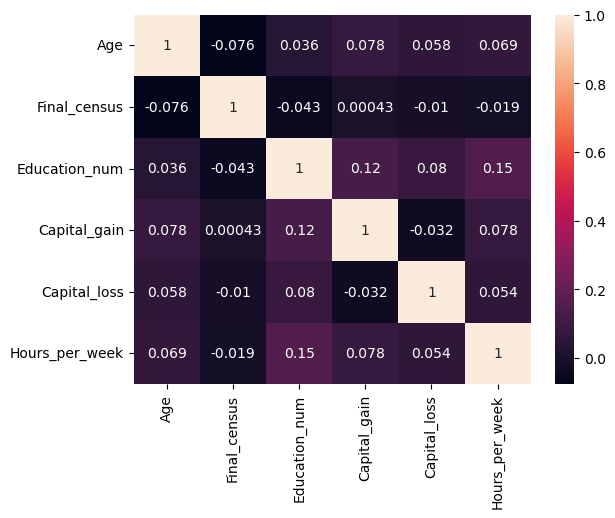

In [56]:

sns.heatmap(datafile.corr(),annot=True)

# Observation-
1. We could see that there is weak correlation between numerical columns.

In [57]:
#categorical columns
cat_col=[]
for i in datafile.columns:
    if datafile[i].dtype=='object':
        cat_col.append(i)
        
cat_col   

['Profession Class',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Gender',
 'Country',
 'Income']

# Hypothesis testing for testing relation between categorical variables.

This test is used to determine if two categorical variables are independent or if they are in fact related to one another. If two categorical variables are independent, then the value of one variable does not change the probability distribution of the other.

Hypothesis:
Ho: The variables are independent means independent variable does not influence dependent variable.
HA: The variables are not independent (meaning they are related ie independent variable influence dependent variable).

chi-square test value,x^2= Sum(Actual-Expected)**2/Expected.


In [58]:
# For Categorical variables- Chi-square test of independence of variables in a contingency table.
from scipy.stats import chi2_contingency
chi2_test = []
for feature in datafile[cat_col]:
    if chi2_contingency(pd.crosstab(datafile['Income'], datafile[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[cat_col, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,Profession Class,Reject Null Hypothesis
1,Education,Reject Null Hypothesis
2,Marital_status,Reject Null Hypothesis
3,Occupation,Reject Null Hypothesis
4,Relationship,Reject Null Hypothesis
5,Race,Reject Null Hypothesis
6,Gender,Reject Null Hypothesis
7,Country,Reject Null Hypothesis
8,Income,Reject Null Hypothesis


#  Encoding the  object datatype columns:

In [59]:
for i in datafile.select_dtypes('O').columns:
    print('********************************')
    print(i)
    print(datafile[i].value_counts())

********************************
Profession Class
Private             24509
Self-emp-not-inc     2540
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Profession Class, dtype: int64
********************************
Education
HS-grad         10494
Some-college     7282
Bachelors        5353
High School      4248
Masters          1722
Assoc-voc        1382
Assoc-acdm       1067
Prof-school       576
Doctorate         413
Name: Education, dtype: int64
********************************
Marital_status
 Married-civ-spouse       14970
 Never-married            10667
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64
********************************
Occupation
Other-service        5134
Prof-specialty       4136
Craft-repair         4094
Exec-

# using label encoder for binary class and one hot encoder for multiclass.

In [60]:
datafile['Gender']=datafile['Gender'].str.strip()
datafile['Gender']=datafile['Gender'].map({'Male':0,'Female':1})

In [61]:
datafile['Country']=datafile['Country'].str.strip()
datafile['Country']=datafile['Country'].map({'Other':0,'United-States':1})

In [62]:
datafile['Income']=datafile['Income'].str.strip()
datafile['Income']=datafile['Income'].map({'<=50K':0,'>50K':1})

In [63]:
datafile=pd.get_dummies(columns=['Profession Class','Education','Marital_status','Occupation','Race',
                                 'Relationship'],data=datafile,drop_first=True)

In [64]:
datafile.head()

,Age,Final_census,Education_num,Gender,Capital_gain,Capital_loss,Hours_per_week,Country,Income,Profession Class_Local-gov,...,Occupation_Transport-moving,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife
0,39,77516,13,0,2174,0,40,1,0,0,...,0,0,0,0,1,1,0,0,0,0
1,50,83311,13,0,0,0,13,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,38,215646,9,0,0,0,40,1,0,0,...,0,0,0,0,1,1,0,0,0,0
3,53,234721,7,0,0,0,40,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,28,338409,13,1,0,0,40,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [65]:
datafile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 52 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Age                                    32537 non-null  int64
 1   Final_census                           32537 non-null  int64
 2   Education_num                          32537 non-null  int64
 3   Gender                                 32537 non-null  int64
 4   Capital_gain                           32537 non-null  int64
 5   Capital_loss                           32537 non-null  int64
 6   Hours_per_week                         32537 non-null  int64
 7   Country                                32537 non-null  int64
 8   Income                                 32537 non-null  int64
 9   Profession Class_Local-gov             32537 non-null  uint8
 10  Profession Class_Never-worked          32537 non-null  uint8
 11  Profession Class_Private    

# Now splitting dataset into x and y so that we can do scaling -

In [66]:
# Dropping target column income and final census as distribution for both income group is same.
x=datafile.drop(['Income','Final_census'],axis=1)
y=datafile['Income']

In [67]:
# scaling the columns by standard scaler as we have seen some outliers are also there.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x[['Age','Education_num','Capital_gain','Capital_loss','Hours_per_week']]=scaler.fit_transform(x[['Age','Education_num','Capital_gain','Capital_loss','Hours_per_week']])

In [68]:
x.head()

,Age,Education_num,Gender,Capital_gain,Capital_loss,Hours_per_week,Country,Profession Class_Local-gov,Profession Class_Never-worked,Profession Class_Private,...,Occupation_Transport-moving,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife
0,0.030390,1.134777,0,0.148292,-0.216743,-0.035664,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1,0.836973,1.134777,0,-0.145975,-0.216743,-2.222483,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,-0.042936,-0.420679,0,-0.145975,-0.216743,-0.035664,1,0,0,1,...,0,0,0,0,1,1,0,0,0,0
3,1.056950,-1.198407,0,-0.145975,-0.216743,-0.035664,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,-0.776193,1.134777,1,-0.145975,-0.216743,-0.035664,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1


In [69]:
y.value_counts(normalize=True)

0    0.759074
1    0.240926
Name: Income, dtype: float64

# Split the data into training and test
Training for building a model and test for predicting the model performance

In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

# We can see our data is imbalanced 76% for 0 and 24% for 1. So balancing data through oversampling method RandomOverSampler.

In [71]:
from imblearn.over_sampling import RandomOverSampler
over = RandomOverSampler(sampling_strategy='auto')
x_over, y_over = over.fit_resample(x_train,y_train)
x_over.shape,y_over.shape

((39476, 50), (39476,))

In [72]:
print(2233

SyntaxError: incomplete input (4161628997.py, line 1)

# Developing different models -

# 1. Logistic Regression Model

In [73]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression()
logreg_model.fit(x_over, y_over)

LogisticRegression()

In [ ]:
# Predict result
y_pred_train = logreg_model.predict(x_over)
y_pred_test = logreg_model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print("classification_report")
print(classification_report(y_test, y_pred_test))

In [ ]:
cm1=confusion_matrix(y_over, y_pred_train)
cm2=confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(10,2))

plt.subplot(1,2,1)
sns.heatmap(cm1, annot=True, fmt="d")
plt.title(' Logistic Regression - Confusion matrix - Train')
plt.xlabel("Predicted Value")
plt.ylabel("Truth")

plt.subplot(1,2,2)
sns.heatmap(cm2, annot=True, fmt="d")
plt.title('Logistic Regression -Confusion matrix - Test')
plt.xlabel("Predicted Value")
plt.ylabel("Truth")

plt.show()


In [ ]:
print("Training Accuracy", accuracy_score(y_over, y_pred_train))
print("****************"*5)
print("Test Accuracy", accuracy_score(y_test, y_pred_test))

# ROC curve = Receiver Operating Characteristic curve. 
 1. It is nothing but a graph displaying the performance of a classification model. 
 2. The theoretical range of the AUC ROC curve score is between 0 and 1
 


In [ ]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_over,y_pred_train,name='Logistic Regression - Train')
RocCurveDisplay.from_predictions(y_test,y_pred_test,name='Logistic Regression - Test')
plt.show()


In [ ]:
### Doing cross validation for improving accuracy
from sklearn.model_selection import cross_val_score
train_accuracy = cross_val_score(logreg_model, x_over, y_over, cv=10)
test_accuracy = cross_val_score(logreg_model, x_test, y_test, cv = 10)
print(train_accuracy.mean())
print("*********************")
print(test_accuracy.mean())

# 2. Desicion Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',class_weight={0:1,1:5})
dt.fit(x_over,y_over)
y_pred_dt_train = dt.predict(x_over)
y_pred_dt_test = dt.predict(x_test)
print(classification_report(y_over, y_pred_dt_train))
print("**********************************")
print(classification_report(y_test, y_pred_dt_test))
print("**********************************")
print("Train Accuracy", accuracy_score(y_over, y_pred_dt_train))
print("**********************************")
print("Test Accuracy", accuracy_score(y_test, y_pred_dt_test))



In [ ]:
cm1=confusion_matrix(y_over, y_pred_dt_train)
cm2=confusion_matrix(y_test, y_pred_dt_test)
plt.figure(figsize=(10,2))

plt.subplot(1,2,1)
sns.heatmap(cm1, annot=True, fmt="d")
plt.title('Desicion Tree - Confusion matrix - Train')
plt.xlabel("Predicted Value")
plt.ylabel("Truth")

plt.subplot(1,2,2)
sns.heatmap(cm2, annot=True, fmt="d")
plt.title('Desicion Tree -Confusion matrix - Test')
plt.xlabel("Predicted Value")
plt.ylabel("Truth")

plt.show()


In [ ]:
# Doing cross validation for improving accuracy
from sklearn.model_selection import cross_val_score
train_accuracy = cross_val_score(dt, x_over, y_over, cv=20)
test_accuracy = cross_val_score(dt, x_test, y_test, cv = 20)
print(train_accuracy.mean())
print("*********************")
print(test_accuracy.mean())

In [ ]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_over,y_pred_dt_train,name='Desicion Tree - Train')
RocCurveDisplay.from_predictions(y_test,y_pred_dt_test,name='Desicion Tree - Test')
plt.show()


In [ ]:
17print(''

# 3. KNN Model -

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_over,y_over)
neigh

In [ ]:
y_pred_knn_train = neigh.predict(x_over)
y_pred_knn_test = neigh.predict(x_test)

In [ ]:
print(classification_report(y_over, y_pred_knn_train))
print("**********************************")
print(classification_report(y_test, y_pred_knn_test))
print("**********************************")
print("Train Accuracy", accuracy_score(y_over, y_pred_knn_train))
print("**********************************")
print("Test Accuracy", accuracy_score(y_test, y_pred_knn_test))

In [ ]:
cm1=confusion_matrix(y_over, y_pred_knn_train)
cm2=confusion_matrix(y_test, y_pred_knn_test)
plt.figure(figsize=(10,2))

plt.subplot(1,2,1)
sns.heatmap(cm1, annot=True, fmt="d")
plt.title('KNN - Confusion matrix - Train')
plt.xlabel("Predicted Value")
plt.ylabel("Truth")

plt.subplot(1,2,2)
sns.heatmap(cm2, annot=True, fmt="d")
plt.title('KNN -Confusion matrix - Test')
plt.xlabel("Predicted Value")
plt.ylabel("Truth")

plt.show()

In [ ]:
# Doing cross validation for improving accuracy
from sklearn.model_selection import cross_val_score
train_accuracy = cross_val_score(neigh, x_over, y_over, cv=10)
test_accuracy = cross_val_score(neigh, x_test, y_test, cv = 10)
print(train_accuracy.mean())
print("*********************")
print(test_accuracy.mean())

In [ ]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_over,y_pred_knn_train,name='KNN - Train')
RocCurveDisplay.from_predictions(y_test,y_pred_knn_test,name='KNN - Test')
plt.show()


# 4. SVM Model-

In [ ]:
from sklearn.svm import SVC
svc_model = SVC(kernel='rbf')
svc_model.fit(x_over, y_over) 

In [ ]:
y_pred_svc_train = svc_model.predict(x_over)
y_pred_svc_test = svc_model.predict(x_test)

In [ ]:
print(classification_report(y_over, y_pred_svc_train))
print("**********************************")
print(classification_report(y_test, y_pred_svc_test))
print("**********************************")
print("Train Accuracy", accuracy_score(y_over, y_pred_svc_train))
print("**********************************")
print("Test Accuracy", accuracy_score(y_test, y_pred_svc_test))

In [ ]:
cm=confusion_matrix(y_over, y_pred_svc_train)
plt.figure(figsize=(4,2))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('SVM - Confusion matrix')
plt.xlabel("Predicted Value")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_over,y_pred_svc_train,name='SVC - Train')
RocCurveDisplay.from_predictions(y_test,y_pred_svc_test,name='SVC - Test')
plt.show()


# 5. Naive Bayes Model-

In [ ]:
from sklearn.naive_bayes import BernoulliNB
naive = BernoulliNB()  
naive.fit(x_over, y_over) 

In [ ]:
y_pred_naive_train = naive.predict(x_over)
y_pred_naive_test = naive.predict(x_test)

In [ ]:
print(classification_report(y_over, y_pred_naive_train))
print("**********************************")
print(classification_report(y_test, y_pred_naive_test))
print("**********************************")
print("Train Accuracy", accuracy_score(y_over, y_pred_naive_train))
print("**********************************")
print("Test Accuracy", accuracy_score(y_test, y_pred_naive_test))

In [ ]:
cm1=confusion_matrix(y_over, y_pred_naive_train)
cm2=confusion_matrix(y_test, y_pred_naive_test)
plt.figure(figsize=(10,2))

plt.subplot(1,2,1)
sns.heatmap(cm1, annot=True, fmt="d")
plt.title('Naive bayes- Confusion matrix - Train')
plt.xlabel("Predicted Value")
plt.ylabel("Truth")

plt.subplot(1,2,2)
sns.heatmap(cm2, annot=True, fmt="d")
plt.title('Naive bayes- Confusion matrix - Test')
plt.xlabel("Predicted Value")
plt.ylabel("Truth")

plt.show()

In [ ]:
# Doing cross validation for improving accuracy
#from sklearn.model_selection import cross_val_score
train_accuracy = cross_val_score(naive, x_over, y_over, cv=10)
test_accuracy = cross_val_score(naive, x_test, y_test, cv = 10)
print(train_accuracy.mean())
print("*********************")
print(test_accuracy.mean())

In [ ]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_over,y_pred_naive_train,name='Naive Bayes - Train')
RocCurveDisplay.from_predictions(y_test,y_pred_naive_test,name='Naive Bayes - Test')
plt.show()


# 6.random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_over,y_over)

In [ ]:
y_pred_rf_train = rf.predict(x_over)
y_pred_rf_test = rf.predict(x_test)

In [ ]:
print(classification_report(y_over, y_pred_rf_train))
print("**********************************")
print(classification_report(y_test, y_pred_rf_test))
print("**********************************")
print("Train Accuracy", accuracy_score(y_over, y_pred_rf_train))
print("**********************************")
print("Test Accuracy", accuracy_score(y_test, y_pred_rf_test))

In [ ]:
cm1=confusion_matrix(y_over, y_pred_rf_train)
cm2=confusion_matrix(y_test, y_pred_rf_test)
plt.figure(figsize=(10,2))

plt.subplot(1,2,1)
sns.heatmap(cm1, annot=True, fmt="d")
plt.title('Random forest- Confusion matrix - Train')
plt.xlabel("Predicted Value")
plt.ylabel("Truth")

plt.subplot(1,2,2)
sns.heatmap(cm2, annot=True, fmt="d")
plt.title('Random forest- Confusion matrix - Test')
plt.xlabel("Predicted Value")
plt.ylabel("Truth")

plt.show()

In [ ]:
# Doing cross validation for improving accuracy
#from sklearn.model_selection import cross_val_score
train_accuracy = cross_val_score(rf, x_over, y_over, cv=10)
test_accuracy = cross_val_score(rf, x_test, y_test, cv = 10)
print(train_accuracy.mean())
print("*********************")
print(test_accuracy.mean())

In [ ]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_over,y_pred_rf_train,name='Random Forest - Train')
RocCurveDisplay.from_predictions(y_test,y_pred_rf_test,name='Random Forest - Test')
plt.show()


# 7. XGBoost

In [ ]:
import xgboost as xgb
xgb_cl = xgb.XGBClassifier(objective="binary:logistic",learning_rate=0.5)
xgb_cl.fit(x_over, y_over)


In [ ]:
y_pred_XGB_train = xgb_cl.predict(x_over)
y_pred_XGB_test = xgb_cl.predict(x_test)


In [ ]:
print(classification_report(y_over, y_pred_XGB_train))
print("**********************************")
print(classification_report(y_test, y_pred_XGB_test))
print("**********************************")
print("Train Accuracy", accuracy_score(y_over, y_pred_XGB_train))
print("**********************************")
print("Test Accuracy", accuracy_score(y_test, y_pred_XGB_test))

In [ ]:
cm1=confusion_matrix(y_over, y_pred_XGB_train)
cm2=confusion_matrix(y_test, y_pred_XGB_test)
plt.figure(figsize=(10,2))

plt.subplot(1,2,1)
sns.heatmap(cm1, annot=True, fmt="d")
plt.title('XGB- Confusion Matrix - Train')
plt.xlabel("Predicted Value")
plt.ylabel("Truth")

plt.subplot(1,2,2)
sns.heatmap(cm2, annot=True, fmt="d")
plt.title('XGB- Confusion matrix - Test')
plt.xlabel("Predicted Value")
plt.ylabel("Truth")

plt.show()

In [ ]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_over,y_pred_XGB_train,name='XGBoost - Train')
RocCurveDisplay.from_predictions(y_test,y_pred_XGB_test,name='XGBoost - Test')
plt.show()


In [ ]:
# Doing cross validation for improving accuracy
#from sklearn.model_selection import cross_val_score
train_accuracy = cross_val_score(xgb_cl, x_over, y_over, cv=10)
test_accuracy = cross_val_score(xgb_cl, x_test, y_test, cv = 10)
print(train_accuracy.mean())
print("*********************")
print(test_accuracy.mean())

# We could see XGBoost, Randomforest,Logistic Reg,Desicion Tree are performing best. But SVM, KNN are slow and time consuming.

	



# Now 2nd part of our project - Identify the factors that contribute to higher incomes.

# 1. SelectKBest approach -

# SelectKBest
 - It select features according to the k highest scores  based on univariate statistical tests.
 - These object take as input a scoring function that returns univariate scores and p-values.
 - mutual_info_classif gives Mutual information (MI) [1] between two random variables. It is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.It is based on entropy estimation from k-nearest neighbors distances.
 - If you use sparse data (i.e. data represented as sparse matrices), mutual_info_classif will deal with the data without making it dense.

In [ ]:
from sklearn.feature_selection import SelectKBest,mutual_info_classif
bestfeatures=SelectKBest(score_func=mutual_info_classif)
best_features=bestfeatures.fit(x,y)

In [ ]:
dfscores=pd.DataFrame(best_features.scores_)
dfcolumns=pd.DataFrame(x.columns)
features_score=pd.concat([dfcolumns,dfscores],axis=1)


In [ ]:
features_score.columns=["Features","Score"]
features_score.sort_values('Score',ascending=False)

In [ ]:
best_features=features_score.nlargest(15,"Score")
best_features

# 2. Random Forest Approach -

In [ ]:
imp_features=pd.DataFrame({'Features':x.columns,'Importance':rf.feature_importances_})

In [ ]:
imp_features=imp_features.sort_values('Importance',ascending=False).head(15)
imp_features

# we could see both the approaches give almost the same result, only scores and importance weightage is differing.

In [ ]:
imp_features_datafile=x_train.columns[imp_features.index]

In [ ]:
imp_features_datafile

In [ ]:
x_train2=x_train[imp_features_datafile]
x_train2

# This selected features datafile can be used to generate score for each employee.

In [ ]:
x_train2["Score"]=x_train2[['Age','Hours_per_week','Marital_status_ Married-civ-spouse','Capital_gain','Education_num',
                            'Marital_status_ Never-married','Relationship_ Not-in-family','Capital_loss','Gender',
                           'Relationship_ Own-child','Education_High School','Occupation_Exec-managerial',
                           'Occupation_Other-service','Relationship_ Unmarried','Occupation_Prof-specialty']].sum(axis=1)
x_train2.head()

In [ ]:
x_train2['Score'].describe()

# Here we can see that score is between -4 to 22. This can help to identify the potential employees for further analysis. 


# Conclusion -

This income evaluation prediction ML model can be used for various statistical purpose -
    
    1. Predict whether employees can be given loans or other benefits according to their income.
    
    2. Assigning scores to employees for giving them credibility by using best features related to income.
    
    3. This scores can be utilized to create different categories of employees-
        1. Old age,High income, Highly educated.
        2. Middle aged, Middle income, Average educated.
        3. Young, Low income, Low educated
        
    4. Since we have used 1 for encoding Females in Gender, this can be helpful to encourage females in getting benefits by having good score.

# ***************************** End Of Project ****************************************

Made By-
Dipti Sehit,
Ludhiana, Punjab.